# Analyzing Brent Oil Price and Natural Gas Price Over Time 

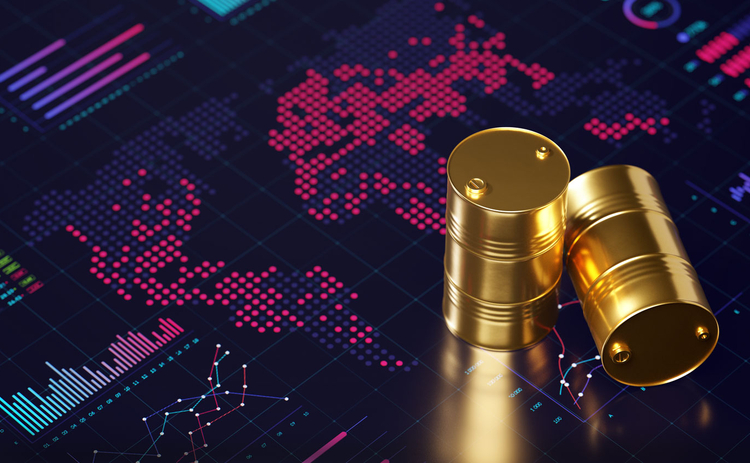
  
                                Figure 1. Crude Oil Price Trend from Risk.Net

The volatility and significance of energy commodities in the global economy have long been subjects of profound interest and scrutiny. Among these commodities, Brent crude oil and natural gas stand as pivotal indicators, influencing financial markets, geopolitics, and everyday consumer activities. This project endeavors to delve into a comprehensive analysis of the historical trends and dynamics surrounding the pricing patterns of Brent oil and natural gas.

Understanding the intricacies of these markets requires a multifaceted approach, involving data collection, statistical analysis, and the application of various analytical tools. By examining the historical pricing trends of Brent oil and natural gas over a specific timeframe, this project aims to uncover insights into the factors influencing price fluctuations and their potential impacts on economic landscapes.

In [1]:
library(ggplot2)
library(dplyr)
library(prophet)
library(pkgbuild)
library(V8)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'prophet' was built under R version 3.6.3"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.6.3"Loading required package: rlang
Warning message:
"package 'rlang' was built under R version 3.6.3"Using V8 engine 6.2.414.50


In [2]:
oilprice = read.csv("BrentOilPrices.csv",header=T)
gasprice = read.csv("oilgasdaily.csv",header=T)

#standardizing class type of dates 
oilprice$Date = as.Date(oilprice$Date, format='%d/%m/%Y')
gasprice$Date = as.Date(gasprice$Date, format='%Y-%m-%d')

head(oilprice)
head(gasprice)

Date,Price
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60


Date,Price
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00
1997-01-14,4.01


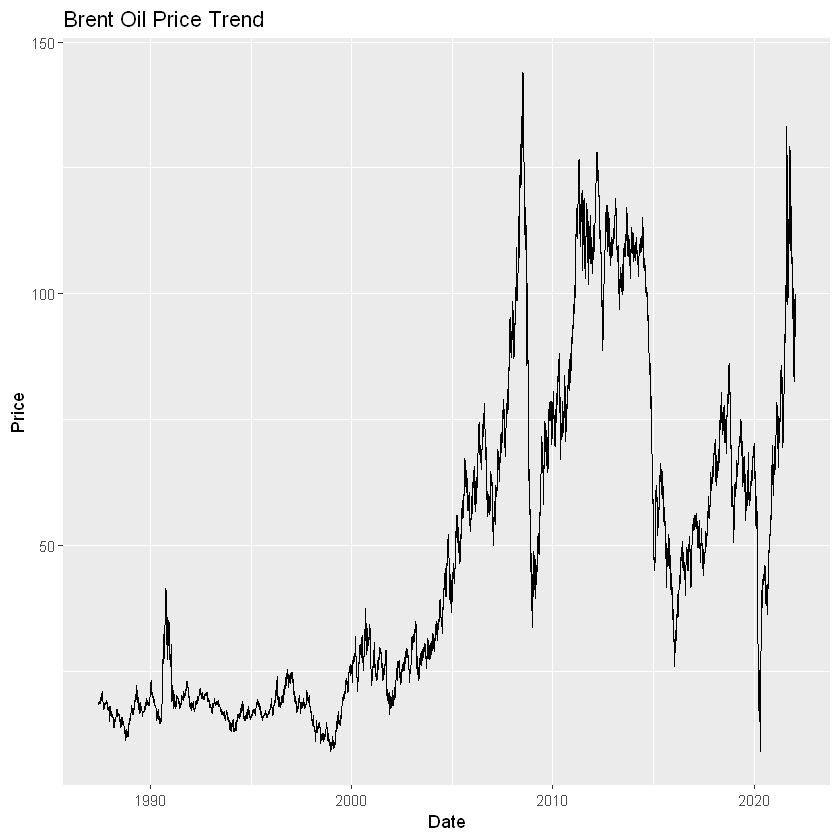

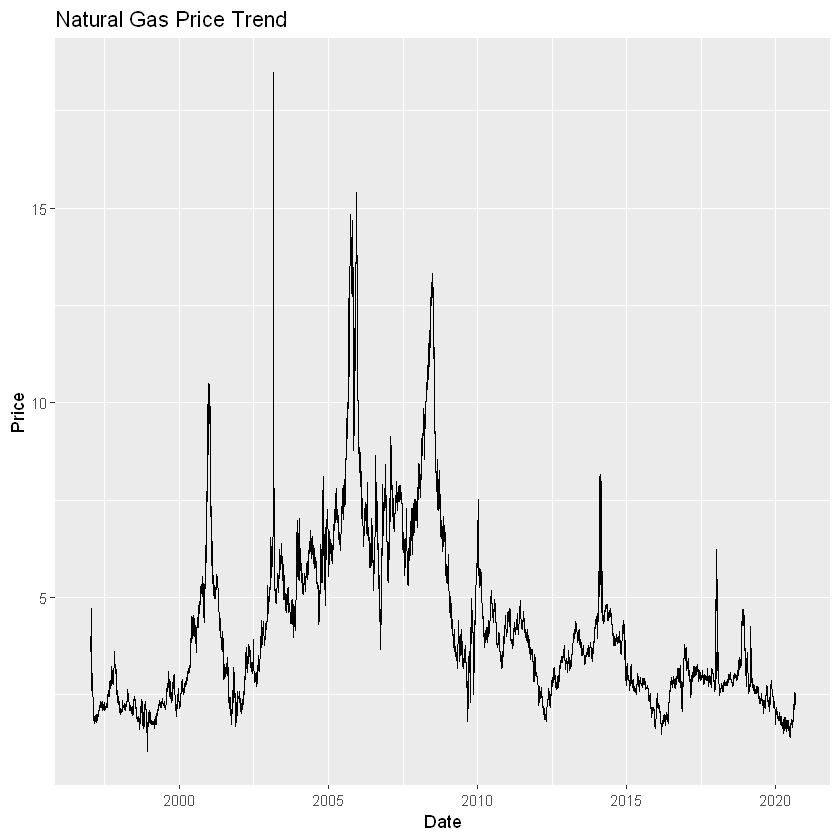

In [3]:
ggplot(oilprice,aes(Date,Price))+geom_line()+ggtitle('Brent Oil Price Trend')
ggplot(gasprice, aes(Date,Price))+geom_line()+ggtitle("Natural Gas Price Trend")

In [4]:
#combining both dataset by date 
merged = merge(oilprice, gasprice, by='Date')
head(merged)
colnames(merged) = c('Date','oil.price','gas.price')
str(merged)

Date,Price.x,Price.y
1997-01-07,24.76,3.82
1997-01-08,24.78,3.80
1997-01-09,24.83,3.61
1997-01-10,24.22,3.92
1997-01-13,23.41,4.00
1997-01-15,23.31,4.34


'data.frame':	5895 obs. of  3 variables:
 $ Date     : Date, format: "1997-01-07" "1997-01-08" ...
 $ oil.price: num  24.8 24.8 24.8 24.2 23.4 ...
 $ gas.price: num  3.82 3.8 3.61 3.92 4 4.34 4.71 3.91 3.26 2.99 ...


# 1. Event Analysis 

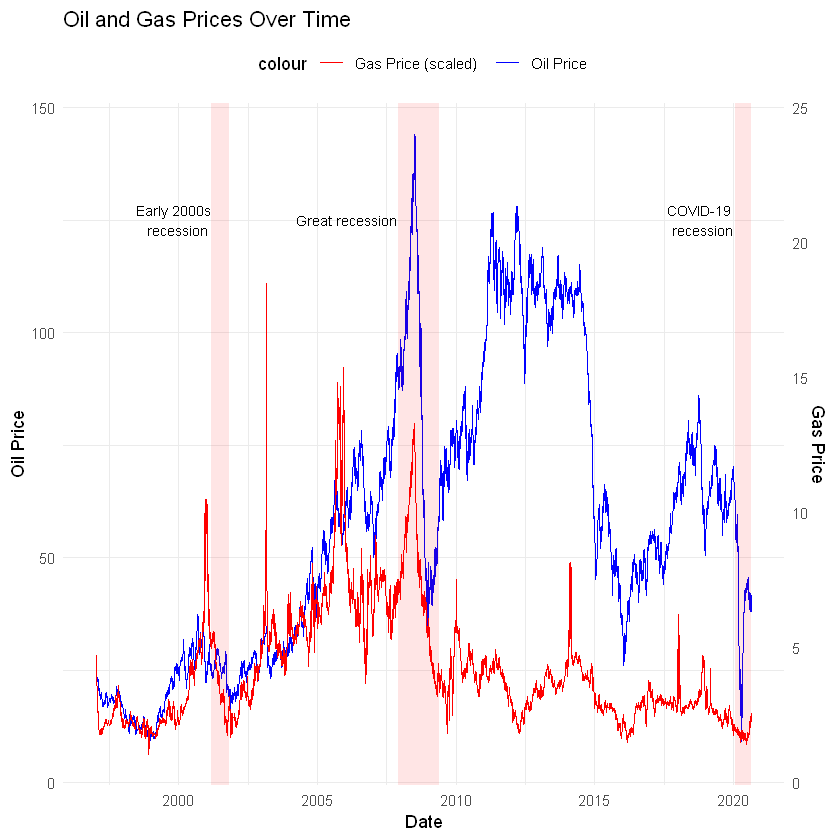

In [5]:
ggplot(merged, aes(x = Date)) +
  geom_line(aes(y = oil.price, color = "Oil Price")) +
  geom_line(aes(y = gas.price * 6, color = "Gas Price (scaled)")) +  # Scale the gas price for illustration
  labs(title = "Oil and Gas Prices Over Time", y = "Oil Price") +
  scale_color_manual(values = c("Oil Price" = "blue", "Gas Price (scaled)" = "red")) +
  scale_y_continuous(
    sec.axis = sec_axis(~./6, name = "Gas Price")
  ) + 
  annotate('rect',
           xmin = as.Date('2001-3-1'),
           xmax = as.Date('2001-11-1'),
           ymin = -Inf,
           ymax = Inf,
           alpha = 0.1,
           fill = 'red') +
  annotate('text',
           x = as.Date('1999-12-1'),
           y = 125,
           size=3,
           label = 'Early 2000s \n recession') +
  
  annotate('rect',
           xmin = as.Date('2007-12-1'),
           xmax = as.Date('2009-6-1'),
           ymin = -Inf,
           ymax = Inf,
           alpha = 0.1,
           fill = 'red') +
  annotate('text',
           x = as.Date('2006-2-1'),
           y = 125,
           size=3,
           label = 'Great recession') +
  
  annotate('rect',
           xmin = as.Date('2020-2-1'),
           xmax = as.Date('2020-09-01'),
           ymin = -Inf,
           ymax = Inf,
           alpha = 0.1,
           fill = 'red') +
  annotate('text',
           x = as.Date('2018-11-1'),
           y = 125,
           size=3,
           label = 'COVID-19 \n recession') +
  theme_minimal()+
  theme(legend.position="top")

# 2. Volatility Analysis

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

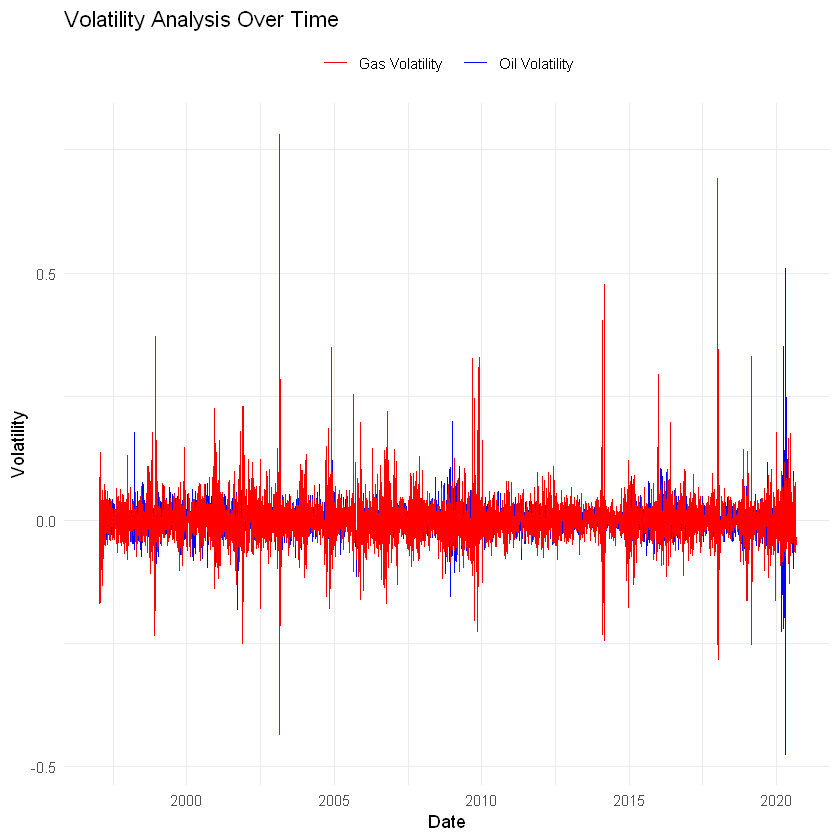

In [6]:
# Calculate daily returns for oil and gas prices
merged = merged %>%
  arrange(Date) %>%
  mutate(
    daily_return_oil = c(NA, (oil.price[-1] - oil.price[-n()]) / oil.price[-n()]),
    daily_return_gas = c(NA, (gas.price[-1] - gas.price[-n()]) / gas.price[-n()])
  )


# Plot volatility over time
ggplot(merged, aes(x = Date)) +
  geom_line(aes(y = daily_return_oil, color = "Oil Volatility")) +
  geom_line(aes(y = daily_return_gas, color = "Gas Volatility")) +
  labs(title = "Volatility Analysis Over Time", y = "Volatility", color='') +
  scale_color_manual(values = c("Oil Volatility" = "blue", "Gas Volatility" = "red")) +
  theme_minimal()+
  theme(legend.position = "top")
  

# 3. Price Ratio (Brent Oil/Natural Gas) Analysis

In [7]:
merged = merged %>%
  mutate(price_ratio = oil.price / gas.price)
head(merged)

merged = merged %>%
  mutate(ma_30 = zoo::rollmean(price_ratio, k = 30, fill = NA, align = "right"))


Date,oil.price,gas.price,daily_return_oil,daily_return_gas,price_ratio
1997-01-07,24.76,3.82,NA,NA,6.481675
1997-01-08,24.78,3.80,0.0008077544,-0.005235602,6.521053
1997-01-09,24.83,3.61,0.0020177563,-0.050000000,6.878116
1997-01-10,24.22,3.92,-0.0245670560,0.085872576,6.178571
1997-01-13,23.41,4.00,-0.0334434352,0.020408163,5.852500
1997-01-15,23.31,4.34,-0.0042716788,0.085000000,5.370968


Warning message:
"Removed 29 rows containing missing values (geom_path)."

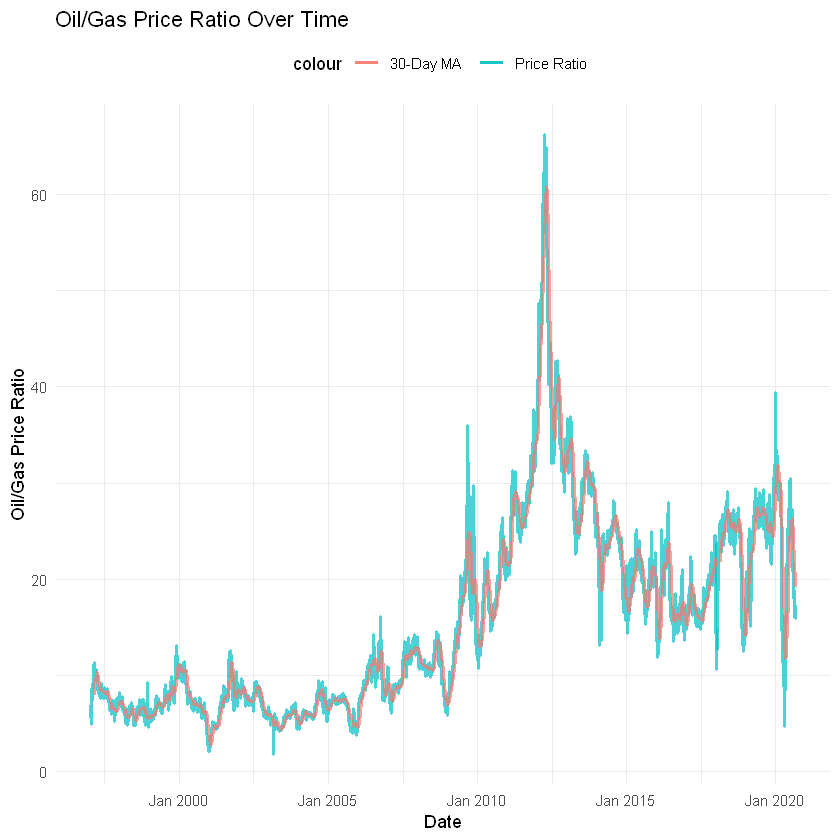

In [8]:
# Plot the price ratio and its 30-day moving average over time
ggplot(merged, aes(x = Date)) +
  geom_line(aes(y = price_ratio, color = "Price Ratio"), size = 1, alpha = 0.7, linetype = "solid") +
  geom_line(aes(y = ma_30, color = "30-Day MA"), size = 1, alpha = 0.7, linetype = "solid") +
  labs(title = "Oil/Gas Price Ratio Over Time", y = "Oil/Gas Price Ratio") +
  theme_minimal() +
  scale_x_date(date_labels = "%b %Y", date_breaks = "5 year") +  # Adjust date formatting
  theme_minimal()+
  theme(legend.position = "top")

# 4. Forecasting Price Trend (Prophet)

4.1 Forecasting Brent Oil Price

In [9]:
f_oilprice = oilprice
colnames(f_oilprice) = c('ds','y')
head(f_oilprice)


ds,y
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60


In [10]:
model = prophet(daily.seasonality = FALSE)
op = fit.prophet(model, f_oilprice)
ofuture = make_future_dataframe(op,periods=365)
tail(future)

,ds
9371,2023-01-27
9372,2023-01-28
9373,2023-01-29
9374,2023-01-30
9375,2023-01-31
9376,2023-02-01


In [11]:
oforecast = predict(op, ofuture)
tail(oforecast[c('ds','yhat','yhat_lower','yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
9371,2023-01-27,84.86345,68.94040,99.83438
9372,2023-01-28,82.72904,66.58341,96.95117
9373,2023-01-29,83.02718,67.66540,98.78402
9374,2023-01-30,84.83957,69.84970,100.05127
9375,2023-01-31,84.74123,69.40043,99.27295
9376,2023-02-01,84.75187,69.52082,99.68100


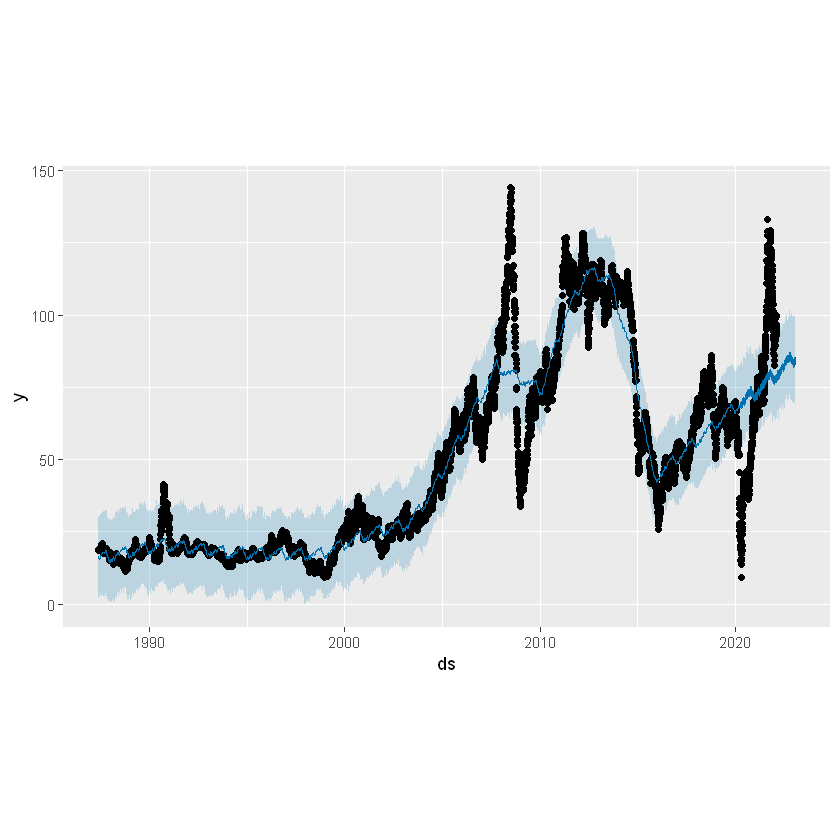

In [12]:
plot(op,oforecast)

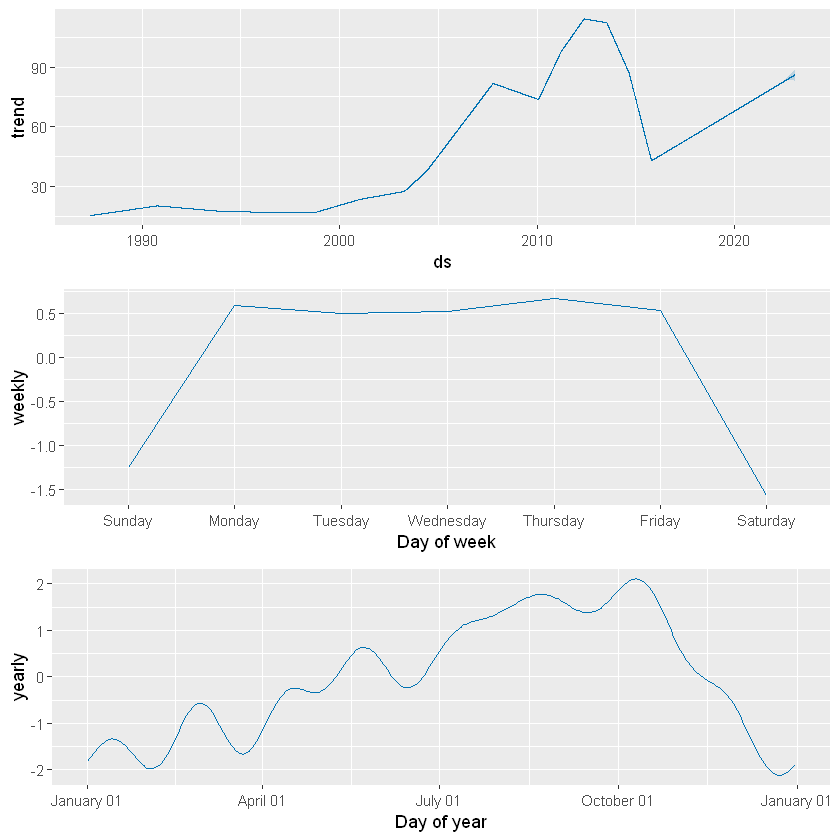

In [13]:
prophet_plot_components(op, oforecast)


In [14]:
dyplot.prophet(op, oforecast)


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


HTML widgets cannot be represented in plain text (need html)

4.2 Forecasting Natural Gas Price

In [15]:
f_gasprice = gasprice
colnames(f_gasprice) = c('ds','y')
head(f_gasprice)



ds,y
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00
1997-01-14,4.01


In [16]:
gp = fit.prophet(model, f_gasprice)
gfuture = make_future_dataframe(gp, periods=365)
tail(gfuture)

,ds
6313,2021-08-27
6314,2021-08-28
6315,2021-08-29
6316,2021-08-30
6317,2021-08-31
6318,2021-09-01


In [17]:
gforecast = predict(gp, gfuture)
tail(gforecast[c('ds','yhat','yhat_lower','yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
6313,2021-08-27,2.161908,0.3965174,4.001569
6314,2021-08-28,2.821710,1.0603736,4.637481
6315,2021-08-29,1.584348,-0.1586223,3.375944
6316,2021-08-30,2.192386,0.5175547,4.081190
6317,2021-08-31,2.226262,0.5749659,4.087311
6318,2021-09-01,2.231131,0.5028525,4.125499


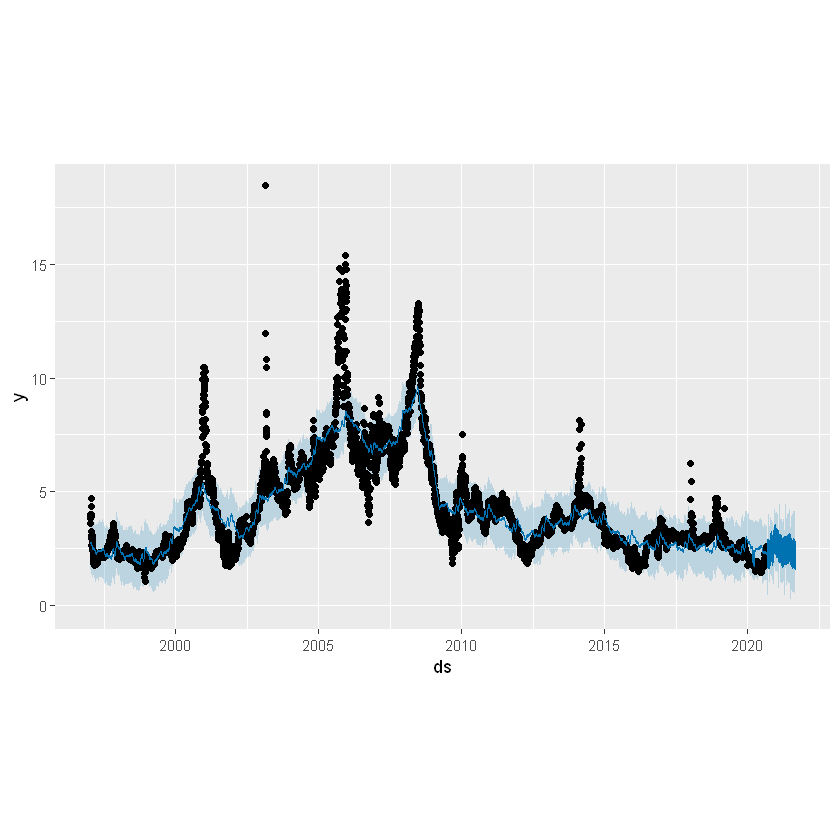

In [18]:
plot(gp, gforecast)

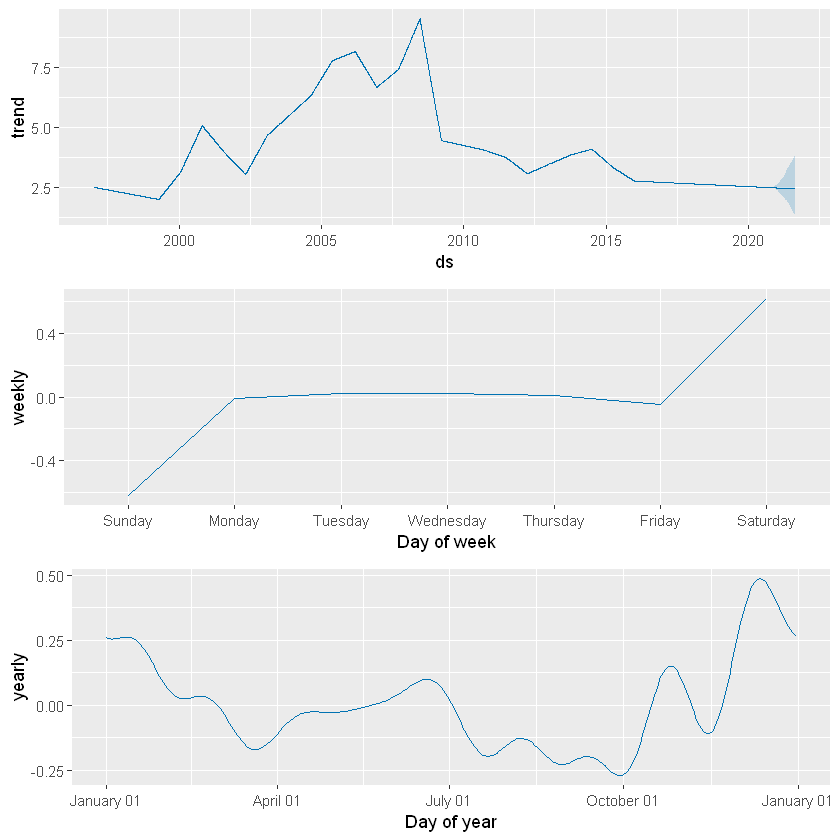

In [19]:
prophet_plot_components(gp, gforecast)


In [20]:
dyplot.prophet(gp, gforecast)


HTML widgets cannot be represented in plain text (need html)

# Conclusion

The amalgamation of event-driven scrutiny, volatility assessments, price ratio examinations, and predictive modeling has unveiled the intricate tapestry of Brent oil and natural gas markets. Events were dissected for their influence on market dynamics, revealing the susceptibility of these commodities to external triggers. Volatility analyses underscored the fluctuating nature of prices, while comparative price ratios highlighted the nuanced relationships between Brent oil and natural gas.

Efforts to forecast prices revealed the challenges of predicting the future trajectory of these energy commodities, emphasizing the complexities and uncertainties inherent in market forecasting. Despite these challenges, this comprehensive analysis consolidates a robust understanding of historical trends and interdependencies, providing stakeholders with valuable insights to navigate the volatile and interconnected realm of global energy markets.